# Trabalho 4 - Operações Geométricas

## Scanner doméstico usando um celular.

Os filhos do professor de visão computacional são aficionados por Star Wars. O maiorzinho queria uma imagem de um storm trooper como plano de fundo para o seu tablet. Contudo, o scanner de casa está quebrado e o salário do professor está muito atrasado. O pior é que o governador Pezão nem sequer diz quando vai pagar os três salário em atraso. Como a grana está curta, o professor resolveu usar câmera do celular. No entanto, é sabido que a imagem obtida pela câmera impõe à imagem original uma geometria projetiva e esta distorção precisa ser compensada já que o garoto ficou muito triste com a qualidade do resultado obtido pela câmera. Felizmente, como o pai dos meninos é professor, ele propôs que seus alunos da Uerj resolvessem este problema como trabalho para a disciplina. Para facilitar a tarefa, o professor fotografou a imagem do storm trooper sobre uma folha de papel A4 que serve como referência. Obtenha a transformação projetiva que recupere a geometria da imagem original e reconstrua-a usando a interpolação bilinear. Veja a seguir a imagem de entrada.

Faça toda a álgebra linear manualmente, das bibliotecas usadas no curso, você só pode usar as funções  ```imread``` e ```imwrite```.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold = np.nan)

-------

#### Definição de Funções

In [3]:
def img2binary(img, threshold = 60):
    """Binarization of image with threshold given"""
    return threshold < img

In [4]:
def roberts(img):
    """Apply Roberts filter to image"""
    k_robertsx = np.array([[1, 0], [0, -1]])
    k_robertsy = np.array([[0, 1], [-1, 0]])
    robertsx = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(k_robertsx, -1)))
    robertsy = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(k_robertsy, -1)))
    
    return robertsx + robertsy

In [5]:
def binary_roberts(img, threshold = 60):
    """Returns roberts image in binary scale"""
    return img2binary(roberts(img), threshold).astype(np.uint8)

In [6]:
def detect_corners(img):
    """Detect corners based on non zero pixel of image object borders"""
    b = np.where(img > 0)
    p1 = np.array([b[0][np.argmin(b[0])], b[1][np.argmin(b[0])]])
    p2 = np.array([b[0][np.argmax(b[1])], b[1][np.argmax(b[1])]])
    p3 = np.array([b[0][np.argmax(b[0])], b[1][np.argmax(b[0])]])
    p4 = np.array([b[0][np.argmin(b[1])], b[1][np.argmin(b[1])]])
    p5 = np.array([b[1].min(), b[0].min()])
    p6 = np.array([b[1].min(), b[0].max()])
    p7 = np.array([b[1].max(), b[0].max()])
    p8 = np.array([b[1].max(), b[0].min()])
    
    corners = np.array([p1, p2, p3, p4, p5, p6, p7, p8])
    
    return np.unique(corners[img[corners[:,0], corners[:,1]] == 1], axis = 0)

In [7]:
def cornerfy_from_file(filein, fileout = ''):
    imgin = cv.imread(filein, 0)
    roberts_binary = binary_roberts(imgin)
    corners = detect_corners(roberts_binary)
#     save_image_with_corners(imgin, corners, fileout)
    return roberts_binary, corners

In [8]:
def cornerfy_from_array(arrayin, fileout = ''):
    roberts_binary = binary_roberts(arrayin)
    corners = detect_corners(roberts_binary)
#     save_image_with_corners(arrayin, corners, fileout)
    return roberts_binary, corners

In [9]:
def true_corners(img, corners):
    for i in range(len(corners)):
        if img[tuple(corners[i])] == 0:
            ind = tuple(corners[i])
            idx = np.argwhere(img)
            idx = idx[~(idx == ind).all(1)]
            corners[i] = idx[((idx - ind)**2).sum(1).argmin()]
    
    return corners

-------

## Figuras/Imagens

Lê a figura do Stormtrooper

In [10]:
stormtrooper = cv.imread('../images/IMG_20170615_082455.jpg', 0)

Cria o painel do A4 em branco (sem intensidade nos pixels)

In [11]:
# A4 para 150 ppi
# A4 totalmente branco
a4 = np.zeros((1754, 1240), dtype = np.uint8)

Cria um losango

In [12]:
diamond = np.uint8([[(30 <= x + y) & (10 >= -x + y) & (-10 <= -x + y) & (50 >= x + y) for y in range(41)] for x in range(41)]) * 255

Cria um quadrado

In [13]:
square = np.uint8([[(x >= 10) & (x <= 30) & (y >= 10) & (y <= 30) for y in range(41)] for x in range(41)]) * 255

------

## Teste da Identificação dos Cantos

Usando as imagens do losango e do quadrado vamos testar o algoritmo para identificar os cantos da imagem.

In [14]:
diamond_roberts, diamond_corners = cornerfy_from_array(diamond)
diamond_corners = true_corners(diamond, diamond_corners)

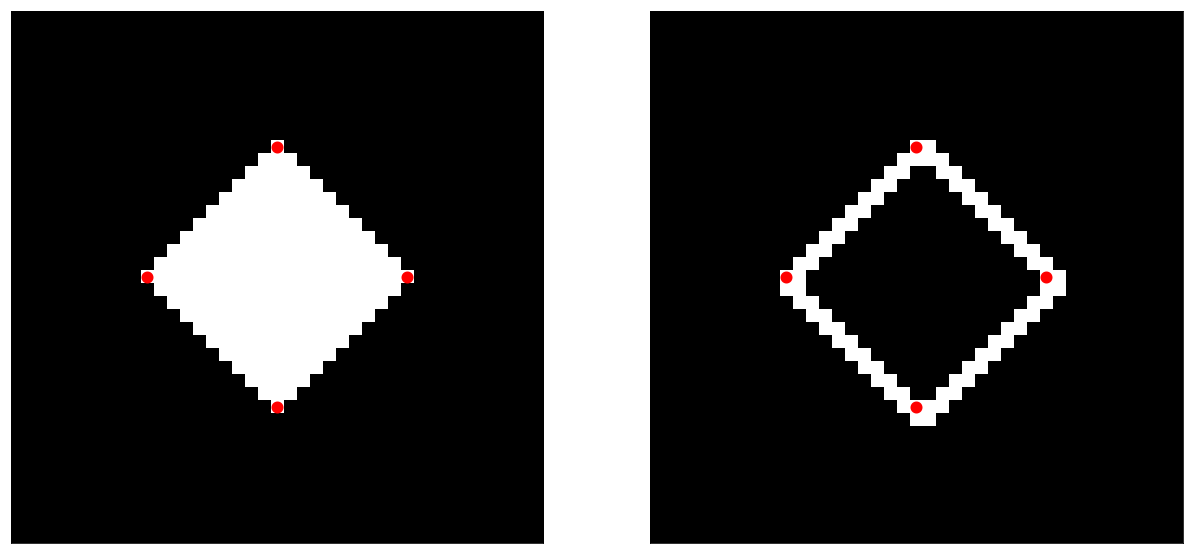

In [15]:
fig = plt.figure(figsize = (21,15))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(diamond, cmap = 'gray')
ax.scatter(diamond_corners[:,1], diamond_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1, 2, 2)
ax.imshow(diamond_roberts, cmap = 'gray')
ax.scatter(diamond_corners[:,1], diamond_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.xticks([])
plt.yticks([])

plt.show()

In [16]:
square_roberts, square_corners = cornerfy_from_array(square)
square_corners = true_corners(square, square_corners)

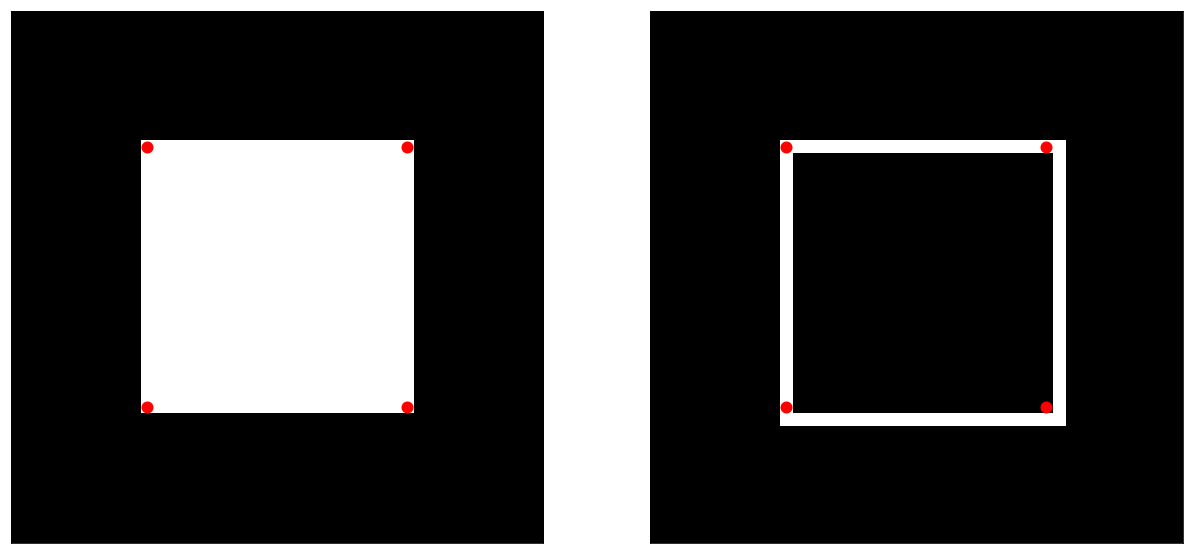

In [17]:
fig = plt.figure(figsize = (21,15))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(square, cmap = 'gray')
ax.scatter(square_corners[:,1], square_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1, 2, 2)
ax.imshow(square_roberts, cmap = 'gray')
ax.scatter(square_corners[:,1], square_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.xticks([])
plt.yticks([])
plt.show()

plt.show()

In [18]:
stormtrooper_roberts, stormtrooper_corners = cornerfy_from_array(stormtrooper)
stormtrooper_corners = true_corners(stormtrooper, stormtrooper_corners)

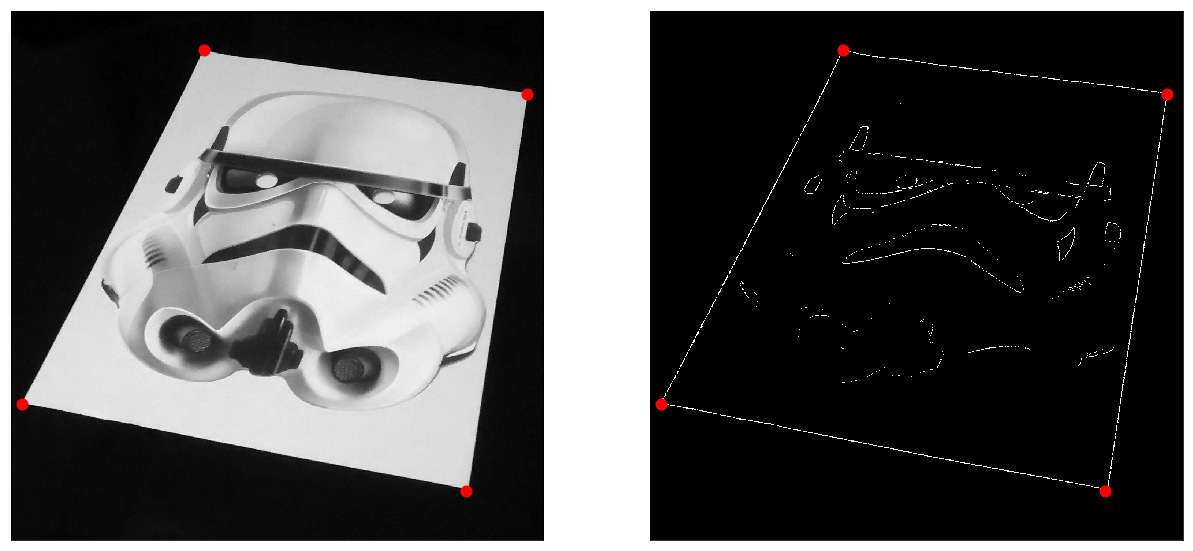

In [19]:
fig = plt.figure(figsize = (21,15))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(stormtrooper, cmap = 'gray')
ax.scatter(stormtrooper_corners[:,1], stormtrooper_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1, 2, 2)
ax.imshow(stormtrooper_roberts, cmap = 'gray')
ax.scatter(stormtrooper_corners[:,1], stormtrooper_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.xticks([])
plt.yticks([])
plt.show()

plt.show()